In [1]:
import os
import time
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import dask.dataframe as dd

data_list = []
for filename in os.listdir('mct31_data'):
    if filename in ['mct31_7월2주차.csv', 'mct31_7월3주차.csv', 'mct31_7월4주차.csv']:
        continue
    raw_data = dd.read_csv('mct31_data/' + filename, dtype={'F_RunState': 'object'})
    raw_data['GDatetime'] = dd.to_datetime(raw_data['GDatetime']).dt.round('S')
    raw_data = raw_data.compute()  # Dask DataFrame을 Pandas DataFrame으로 변환
    raw_data = raw_data.set_index('GDatetime')
    raw_data = raw_data.dropna()
    # raw_data['F_RunState'] = raw_data['F_RunState'].fillna('0')
    raw_data['F_RunState'] = raw_data['F_RunState'].map(lambda x: 1 if x == '작업중' else 2 if x == '작업대기' else 3 if x == '작업정지' else 4 if x == 'STOP' else 5 if x == '알람중' else 0)
    # raw_data['F_OperationTime'] = raw_data['F_OperationTime'].fillna(0)
    # raw_data['F_CuttingTime'] = raw_data['F_CuttingTime'].fillna(0)
    raw_data['F_ToolNum'] = raw_data['F_ToolNum'].bfill()
    raw_data = raw_data.drop(['F_AbsoluteX', 'F_AbsoluteY', 'F_AbsoluteZ', 'F_DistanceX', 'F_DistanceY', 'F_DistanceZ', 'G_MRActP', 'G_MPF', 'G_ADC4', 'F_CuttingTime', 'F_OperationTime'], axis=1)
    data_list.append(raw_data.iloc[:, :-6])

df1 = data_list[0]
df2 = data_list[1]
df3 = data_list[2]
df4 = data_list[3]
df5 = data_list[4]
df6 = data_list[5]
df7 = data_list[6]
df8 = data_list[7]

data = pd.concat([df4,df5,df6,df7], axis=0)
data_all = pd.concat(data_list, axis=0)

# Calculate the shifted differences
diffs = np.diff(data['F_ToolNum'], prepend=data['F_ToolNum'][0])

# Initialize transformed list
transformed = [0]  # starting with 0 as the first value

# Iterate over the differences and build the transformed list
for i in range(1, len(diffs)):
    if diffs[i] == 0:
        transformed.append(transformed[i-1])
    else:
        transformed.append(data['F_ToolNum'][i-1])
data['F_ToolNum'] = transformed

# data['G_MP'] = data['G_MV'] * data['G_MA']
# data.dropna(inplace=True)
data

,F_RunState,F_CycleTime,F_SpindleRPM1,F_SpindleTroq1,F_SpindleGearRatio1,F_ToolNum,G_ADC1,G_ADC2,G_ADC3,G_MV,G_MA,G_MActP,G_MFeq,G_MTemp
GDatetime,,,,,,,,,,,,,,
2023-06-05 07:37:08,1,2,8.0,51.0,704.0,0.0,25.500000,42.200001,0.0,214.919998,10.729,2.676,59.990002,39.0
2023-06-05 07:37:09,1,3,856.0,52.0,704.0,0.0,25.500000,42.200001,0.0,213.720001,28.230,8.103,59.990002,39.0
2023-06-05 07:37:10,1,3,856.0,52.0,704.0,0.0,25.500000,42.299999,0.0,213.679993,22.899,6.212,59.990002,39.0
2023-06-05 07:37:11,1,4,0.0,0.0,704.0,0.0,25.600000,42.000000,1.0,214.350006,13.327,3.168,60.000000,39.0
2023-06-05 07:37:12,1,6,0.0,0.0,704.0,0.0,25.600000,42.000000,1.0,214.350006,13.327,3.168,60.000000,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01 16:27:16,2,10424,0.0,0.0,712.0,21.0,37.200001,38.900002,0.0,220.570007,11.092,2.656,59.970001,45.0
2023-07-01 16:27:17,2,10424,0.0,0.0,712.0,21.0,37.200001,38.900002,0.0,220.669998,11.046,2.644,59.970001,45.0
2023-07-01 16:27:18,2,10424,0.0,0.0,712.0,21.0,37.200001,38.900002,0.0,220.669998,11.046,2.644,59.970001,45.0


In [3]:
# data = pd.read_csv('selected_data.csv')
# data['GDatetime'] = pd.to_datetime(data['GDatetime'])
# data.set_index('GDatetime', inplace=True)
# data

In [3]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay, confusion_matrix, roc_curve, f1_score, roc_auc_score

def verification_train(y, predict):
    # 성능 평가
    print("Train Accuracy  : ", accuracy_score(y, predict))
    print('f1 score        : ', f1_score(y, predict))
    print('Recall Score    : ', recall_score(y, predict))
    print('precision score : ', precision_score(y, predict))
    print('confusion matrix : ------------------\n', confusion_matrix(y, predict))
    print("\n         --------- Test Classification Report --------")
    print(classification_report(y, predict))

    # 혼동 행렬 시각화
    plt.figure()
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y, predict), display_labels=['정상', '이상']).plot(cmap='Blues')
    plt.show()

def verification_test(y, predict):
    # 성능 평가
    print("Train Accuracy  : ", accuracy_score(y, predict))
    print('f1 score        : ', f1_score(y, predict))
    print('Recall Score    : ', recall_score(y, predict))
    print('precision score : ', precision_score(y, predict))
    print('confusion matrix : ------------------\n', confusion_matrix(y, predict))
    print("\n         --------- Test Classification Report --------")
    print(classification_report(y, predict))

    # 혼동 행렬 시각화
    plt.figure()
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y, predict), display_labels=['정상', '이상']).plot(cmap='Blues')
    plt.show()

# def roc_auc(y, predict):
    fpr, tpr, _ = roc_curve(y, predict)
    auc = roc_auc_score(y, predict)

    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0,1], [0,1], linestyle='--')
    plt.text(0.5, 0.3, f'AUC = {auc:.4f}', fontsize=20)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()

In [4]:
def find_cycle_periods(data, threshold_low=100, threshold_high=10000, sub_cycle_threshold=1000, sub_cycle_length_minutes=50):
    cycle_starts = []
    cycle_ends = []
    in_cycle = False
    in_high = False
    in_sub_cycle = False
    label = -1 # 주기 라벨 (0부터 시작)
    
    # label 열을 추가하고 -1로 초기화
    data['label'] = 0
    sub_cycle_start_time = None
    sub_cycle_length = 0
    
    for i in range(len(data) - 1):
        value = data['F_CycleTime'].iloc[i]
        next_value = data['F_CycleTime'].iloc[i + 1]
        
        # 주기 시작 지점 찾기 (0 ~ 100 근처에서 올라가기 시작)
        if not in_cycle and value <= threshold_low:
            in_cycle = True
            label += 1 # 새로운 주기 시작, 라벨 증가
            cycle_starts.append(data.index[i]) # datetime 인덱스 사용
        
        # 주기 내부라면 현재 라벨로 표시
        if in_cycle:
            data['label'].iloc[i] = label

        # 1만 근처의 값에 도달
        if in_cycle and not in_high and value >= threshold_high:
            in_high = True

        # 1천 근처의 값에 도달
        if in_cycle and not in_high and value >= sub_cycle_threshold:
            in_sub_cycle = True
            if sub_cycle_start_time is None:
                sub_cycle_start_time = data.index[i]

        # 하위 주기의 끝 지점 찾기
        if in_sub_cycle and next_value <= threshold_low:
            sub_cycle_length += (data.index[i] - sub_cycle_start_time).seconds / 60
            sub_cycle_start_time = None
            if sub_cycle_length >= sub_cycle_length_minutes:
                in_high = True
            in_sub_cycle = False
            
        # 주기 끝 지점 찾기
        if in_high and next_value <= threshold_low:
            in_high = False
            in_cycle = False
            cycle_ends.append(data.index[i]) # datetime 인덱스 사용
            sub_cycle_length = 0
            
    # 마지막 주기의 끝 지점 처리
    if in_cycle:
        cycle_ends.append(data.index[-1])

    return cycle_starts, cycle_ends


# 함수를 다시 수정하여 지속 시간 10분간 값의 범위가 +-100 미만일 때, 조건이 시작된 시점부터 끝나기 직전까지의 행을 삭제하는 기능을 추가합니다.
def remove_constant_values(data, lower_bound=1000, upper_bound=12000, duration_minutes=3, variance=3):
    variance_start_time = None
    variance_start_index = None
    rows_to_drop = set()

    for i in range(len(data) - 1):
        value = data['F_CycleTime'].iloc[i]
        next_value = data['F_CycleTime'].iloc[i + 1]
        current_time = data.index[i]
        next_time = data.index[i + 1]

        # 값의 변동이 +- 100 미만인 경우
        if abs(next_value - value) < variance:
            if variance_start_time is None:
                variance_start_time = current_time
                variance_start_index = i
            # 지속 시간이 5분 이상인 경우
            if (next_time - variance_start_time).seconds / 60 >= duration_minutes:
                rows_to_drop.update(range(variance_start_index, i + 1))
        else:
            variance_start_time = None
            variance_start_index = None

    # 행 삭제
    data.drop(data.index[list(rows_to_drop)], inplace=True)
    return data


selected_data = data

selected_data = remove_constant_values(selected_data)

# 중복된 인덱스를 가진 행의 평균값으로 병합
selected_data = selected_data.groupby(selected_data.index).mean()

cycle_starts, cycle_ends = find_cycle_periods(selected_data)

selected_data = selected_data.iloc[:-1]
selected_data['anomaly'] = 0
specific_labels = [43, 188, 243, 256, 258, 270, 291, 295, 325, 340, 349, 360]
selected_data.loc[selected_data['label'].isin(specific_labels), 'anomaly'] = 1

In [5]:
selected_data.shape

(1383726, 16)

In [6]:
# 최대 샘플 길이를 정의 (선택적)
max_length = max(len(selected_data.loc[start:end]) for start, end in zip(cycle_starts, cycle_ends))

def create_3d_array(data, cycle_starts, cycle_ends, max_length=None, 
                    feature_columns=['F_RunState', 'F_ToolNum', 'F_CycleTime', 'F_SpindleRPM1', 'F_SpindleTroq1', 'G_ADC3', 'G_MActP', 'G_MTemp', 'anomaly']):
    # 주기별 샘플을 저장할 리스트
    samples = []

    # 각 주기를 샘플로 변환
    for start, end in zip(cycle_starts, cycle_ends):
        sample = data.loc[start:end][feature_columns].values
        
        # 샘플 길이 통일 (선택적)
        if max_length:
            if len(sample) > max_length:
                sample = sample[:max_length]
            elif len(sample) < max_length:
                padding = np.zeros((max_length - len(sample), len(feature_columns)))
                sample = np.vstack((sample, padding))
        
        samples.append(sample)

    # 샘플들을 3차원 배열로 쌓기
    samples_array = np.stack(samples)
    
    return samples_array

# 3차원 배열 생성
samples_array = create_3d_array(selected_data, cycle_starts, cycle_ends, max_length=max_length)

# 결과의 형태 출력
X = samples_array[:,:,:-1]
y = samples_array[:,0,-1]
X.shape, y.shape


((364, 5570, 8), (364,))

In [7]:
tmp = samples_array[:250]

X_train = tmp[tmp[:,0,-1] == 0]
X_train = X_train[:,:,:-1]

tmp2 = tmp[tmp[:,0,-1] == 1]
X_test = np.concatenate((tmp2, samples_array[250:]), axis=0)
y_test = X_test[:,0,-1]
X_test = X_test[:,:,:-1]
print(X_train.shape)
print(X_test.shape, y_test.shape)

(247, 5570, 8)
(117, 5570, 8) (117,)


In [8]:
y_test

array([1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

std = StandardScaler()
mm = MinMaxScaler()

X_train_sc = []
X_test_sc = []

# shuffle
X_train = shuffle(X_train, random_state=1)
X_test = shuffle(X_test, random_state=1)

# X_train, _ = train_test_split(X_train, random_state=42)

# 학습 데이터 변환
for sample in X_train:
    mm_sample = mm.fit_transform(sample[:, :2])
    std_sample = std.fit_transform(sample[:, 2:])
    # std_sample = std.fit_transform(sample)
    sc_sample = np.concatenate((mm_sample, std_sample), axis=1)
    X_train_sc.append(sc_sample)
    # X_train_sc.append(std_sample)

# 테스트 데이터 변환
for sample in X_test:
    mm_sample = mm.transform(sample[:, :2])
    std_sample = std.transform(sample[:, 2:])
    # std_sample = std.transform(sample)
    sc_sample = np.concatenate((mm_sample, std_sample), axis=1)
    # X_test_sc.append(sc_sample)
    X_test_sc.append(std_sample)

# NumPy 배열로 변환
X_train_sc = np.array(X_train_sc)
X_test_sc = np.array(X_test_sc)

In [10]:
X_train.shape[2]

8

In [16]:
from tensorflow.keras import layers, Model, optimizers
from tensorflow.keras.optimizers.schedules import ExponentialDecay

seq_len = X_train_sc.shape[1]
n_channels = X_train_sc.shape[2]

# 하이퍼파라미터 설정
initial_learning_rate = 0.0001
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=10000, decay_rate=0.9)

# 인코더
encoder_inputs = layers.Input(shape=(seq_len, n_channels))

x = layers.Conv1D(8, 10, padding='same', strides=2)(encoder_inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation('gelu')(x)
x = layers.Dropout(0.4)(x)

x = layers.Conv1D(8, 3, padding='same', strides=1)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('gelu')(x)
x = layers.Dropout(0.5)(x)

x = layers.Conv1D(16, 3, padding='same', strides=1)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('gelu')(x)
x = layers.Dropout(0.5)(x)

x = layers.Conv1D(16, 3, padding='same', strides=1)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('gelu')(x)
x = layers.Dropout(0.5)(x)

x = layers.Conv1D(32, 3, padding='same', strides=1)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('gelu')(x)
x = layers.Dropout(0.5)(x)

x = layers.Conv1D(32, 3, padding='same', strides=1)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('gelu')(x)

encoded = layers.GlobalMaxPooling1D()(x)
encoder = Model(encoder_inputs, encoded)

# 디코더
decoder_inputs = layers.Input(shape=(32,))

x = layers.Dense(seq_len * n_channels)(decoder_inputs)  
x = layers.Reshape((seq_len, n_channels))(x)

# x = layers.Dense(seq_len // 2 * 32)(decoder_inputs)
# x = layers.Reshape((seq_len // 2, 32))(x)
# x = layers.UpSampling1D(size=32)(x)
# x = layers.ZeroPadding1D(padding=(0, 1))(x)

x = layers.Conv1D(32, 7, padding='same', strides=1)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('gelu')(x)
x = layers.Dropout(0.5)(x)

x = layers.Conv1D(32, 7, padding='same', strides=1)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('gelu')(x)
x = layers.Dropout(0.5)(x)

x = layers.Conv1D(16, 7, padding='same', strides=1)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('gelu')(x)
x = layers.Dropout(0.5)(x)

x = layers.Conv1D(16, 7, padding='same', strides=1)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('gelu')(x)
x = layers.Dropout(0.5)(x)

x = layers.Conv1D(8, 7, padding='same', strides=1)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('gelu')(x)
x = layers.Dropout(0.5)(x)

x = layers.Conv1D(8, 7, padding='same', strides=1)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('gelu')(x)

decoded = layers.Conv1D(n_channels, 4, activation='linear', padding='same')(x)
# decoder = Model(decoder_inputs, decoded)
# 디코더 모델 정의
decoder = Model(decoder_inputs, x)

# 오토인코더
autoencoder_inputs = layers.Input(shape=(seq_len, n_channels))
encoded = encoder(autoencoder_inputs)
decoded = decoder(encoded)

autoencoder = Model(autoencoder_inputs, decoded)
autoencoder.compile(optimizer=optimizers.Adam(learning_rate=lr_schedule), loss='mse', metrics='acc')

autoencoder.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 5570, 8)]         0         
                                                                 
 model_15 (Functional)       (None, 32)                7152      
                                                                 
 model_16 (Functional)       (None, 5570, 8)           1486720   
                                                                 
Total params: 1493872 (5.70 MB)
Trainable params: 1493424 (5.70 MB)
Non-trainable params: 448 (1.75 KB)
_________________________________________________________________


In [34]:
from tensorflow.keras import layers, Model, optimizers
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# 가상의 seq_len과 n_channels 설정 (실제 데이터에 맞게 수정 필요)
seq_len = X_train.shape[1]  # 예시
n_channels = X_train.shape[2]  # 예시

# 하이퍼파라미터 설정
initial_learning_rate = 0.0001
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=10000, decay_rate=0.9)

# 인코더
encoder_inputs = layers.Input(shape=(seq_len, n_channels))

# SpatialDropout1D와 활성화 함수로 elu 사용
x = layers.Conv1D(8, 11, padding='same', strides=2)(encoder_inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation('elu')(x)
x = layers.SpatialDropout1D(0.3)(x)

x = layers.Conv1D(8, 3, padding='same', strides=1)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('elu')(x)
x = layers.SpatialDropout1D(0.2)(x)

x = layers.Conv1D(16, 3, padding='same', strides=1)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('elu')(x)
x = layers.SpatialDropout1D(0.2)(x)

x = layers.Conv1D(32, 3, padding='same', strides=1)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('elu')(x)
x = layers.SpatialDropout1D(0.2)(x)

x = layers.Conv1D(64, 3, padding='same', strides=1)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('elu')(x)
x = layers.SpatialDropout1D(0.2)(x)

x = layers.Conv1D(64, 3, padding='same', strides=1)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('elu')(x)

encoded = layers.GlobalMaxPooling1D()(x)
encoder = Model(encoder_inputs, encoded)

# 디코더
decoder_inputs = layers.Input(shape=(64,))  # 인코더의 마지막 레이어 차원과 일치

x = layers.Dense(seq_len * n_channels)(decoder_inputs)  
x = layers.Reshape((seq_len, n_channels))(x)

# SpatialDropout1D와 활성화 함수로 elu 사용
x = layers.Conv1D(64, 3, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('elu')(x)
x = layers.SpatialDropout1D(0.2)(x)

x = layers.Conv1D(32, 3, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('elu')(x)
x = layers.SpatialDropout1D(0.2)(x)

x = layers.Conv1D(16, 3, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('elu')(x)
x = layers.SpatialDropout1D(0.2)(x)

x = layers.Conv1D(8, 3, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('elu')(x)

decoded = layers.Conv1D(n_channels, 5, activation='linear', padding='same')(x)

# 디코더 모델 정의
decoder = Model(decoder_inputs, decoded)

# 오토인코더
autoencoder_inputs = layers.Input(shape=(seq_len, n_channels))
encoded = encoder(autoencoder_inputs)
decoded = decoder(encoded)

autoencoder = Model(autoencoder_inputs, decoded)
autoencoder.compile(optimizer=optimizers.Adam(learning_rate=lr_schedule), loss='mse', metrics='acc')

# 모델 구조 출력
autoencoder.summary()


Model: "model_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_27 (InputLayer)       [(None, 5570, 8)]         0         
                                                                 
 model_24 (Functional)       (None, 64)                22208     
                                                                 
 model_25 (Functional)       (None, 5570, 8)           2906928   
                                                                 
Total params: 2929136 (11.17 MB)
Trainable params: 2928512 (11.17 MB)
Non-trainable params: 624 (2.44 KB)
_________________________________________________________________


In [35]:
from tensorflow.keras.callbacks import EarlyStopping

es_callback = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
history = autoencoder.fit(X_train_sc, X_train_sc, validation_split=0.2, batch_size=64, epochs=100, callbacks=[es_callback])

Epoch 1/100
4/4 [==============================] - 9s 1s/step - loss: 1.5695 - acc: 0.1265 - val_loss: 0.9889 - val_acc: 0.2287
Epoch 2/100
4/4 [==============================] - 5s 1s/step - loss: 1.2862 - acc: 0.1646 - val_loss: 0.9789 - val_acc: 0.2471
Epoch 3/100
4/4 [==============================] - 5s 1s/step - loss: 1.1620 - acc: 0.1807 - val_loss: 0.9696 - val_acc: 0.2547
Epoch 4/100
4/4 [==============================] - 6s 1s/step - loss: 1.0851 - acc: 0.1906 - val_loss: 0.9606 - val_acc: 0.2659
Epoch 5/100
4/4 [==============================] - 6s 1s/step - loss: 1.0274 - acc: 0.1973 - val_loss: 0.9520 - val_acc: 0.2727
Epoch 6/100
4/4 [==============================] - 5s 1s/step - loss: 0.9895 - acc: 0.2179 - val_loss: 0.9440 - val_acc: 0.2725
Epoch 7/100
4/4 [==============================] - 5s 1s/step - loss: 0.9547 - acc: 0.2227 - val_loss: 0.9365 - val_acc: 0.2809
Epoch 8/100
4/4 [==============================] - 5s 1s/step - loss: 0.9176 - acc: 0.2186 - val_loss: 0

In [36]:
# 모델을 통해 데이터를 재구성
X_test_pred = autoencoder.predict(X_test_sc)

4/4 [==============================] - 1s 92ms/step


Modified rce shape: (117,)


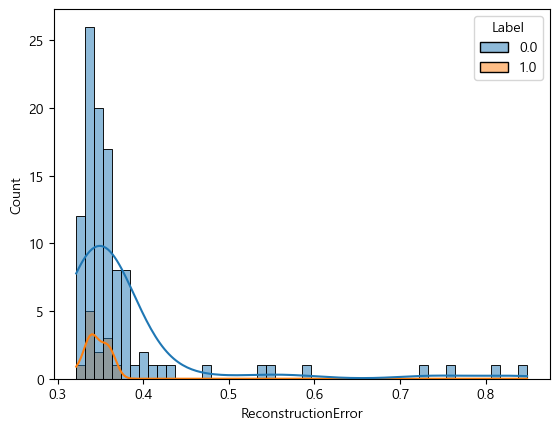

In [37]:
# 재건 에러 계산 함수
def reconstruction_error(x, p):
    return np.mean(np.abs(x - p), axis=(1, -1))

rce = reconstruction_error(X_test_sc, X_test_pred)
print(f"Modified rce shape: {rce.shape}")

# rce와 y_val을 하나의 DataFrame으로 만듭니다.
df = pd.DataFrame({'ReconstructionError': rce, 'Label': y_test})

# 히스토그램을 그립니다.
plt.figure()
sns.histplot(data=df, x='ReconstructionError', hue='Label', bins=50, kde=True)
plt.show()


정확도        : 0.7863247863247863
F1       점수 : 0.0
recall   점수 : 0.0
precision 점수: 0.0
[[92 13]
 [12  0]]


<Figure size 640x480 with 0 Axes>

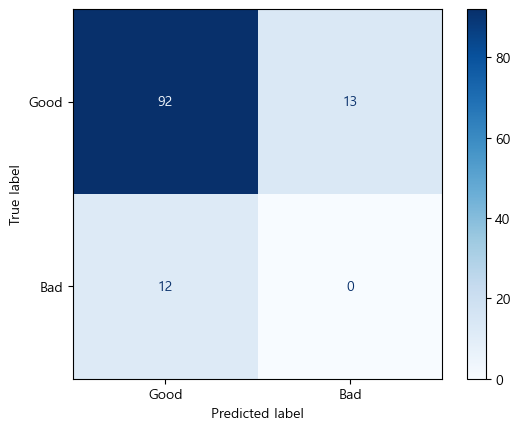

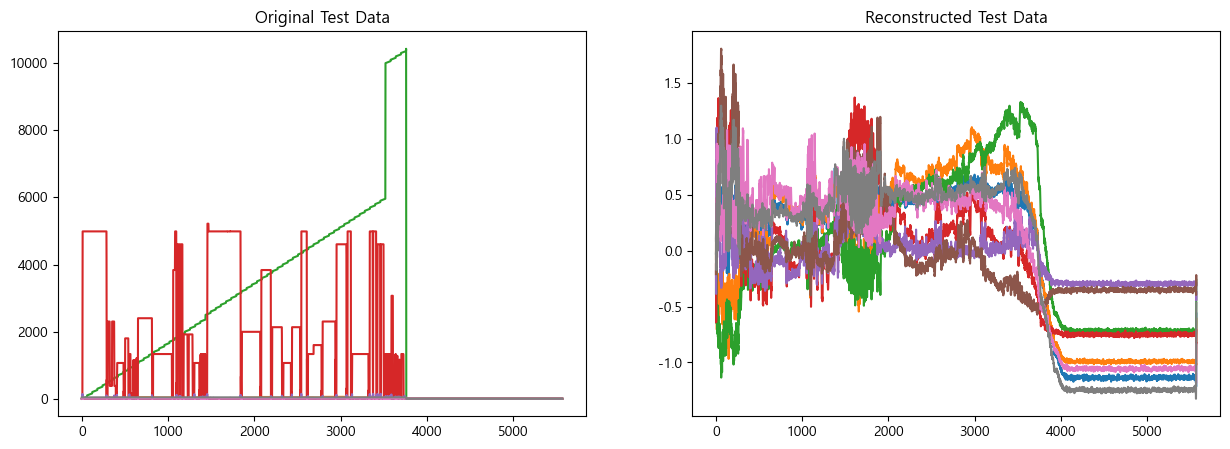

In [39]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, confusion_matrix, recall_score, precision_score

# 임계값 설정, 이 값은 문제에 따라 다르게 설정해야 할 수 있습니다.
threshold = 0.4

# 재구성 에러 계산
rce = reconstruction_error(X_test_sc, X_test_pred)

# 재구성 에러가 임계값보다 큰 경우를 'Bad'(1)로, 그렇지 않은 경우를 'Good'(0)으로 분류
p_val_bin = (rce > threshold).astype(int)

# 이제 p_val_bin과 y_val의 차원이 일치하므로, 평가 메트릭을 계산할 수 있습니다.
print('정확도        :', accuracy_score(y_test, p_val_bin))
print('F1       점수 :', f1_score(y_test, p_val_bin))
print('recall   점수 :', recall_score(y_test, p_val_bin))
print('precision 점수:', precision_score(y_test, p_val_bin))
print(confusion_matrix(y_test, p_val_bin))
plt.figure()
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, p_val_bin), display_labels=['Good', 'Bad']).plot(cmap='Blues')
plt.show()

# 원본 데이터와 재구성된 데이터의 비교 시각화 (테스트 데이터의 첫 번째 샘플을 사용)
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Original Test Data')
plt.plot(X_test[100])

plt.subplot(1, 2, 2)
plt.title('Reconstructed Test Data')
plt.plot(X_test_pred[100])

plt.show()

In [55]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Conv1DTranspose, MaxPooling1D, UpSampling1D, BatchNormalization, Flatten, Reshape, Cropping1D, Dense
from tensorflow.keras.regularizers import l1

# 입력 형태 정의
input_shape = (X_train_sc.shape[1], X_train_sc.shape[2])

# Encoder 부분
input_layer = Input(shape=input_shape)
x = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_layer)
x = MaxPooling1D(pool_size=2, padding='same')(x)
x = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(x)
x = MaxPooling1D(pool_size=2, padding='same')(x)
x = Conv1D(filters=16, kernel_size=3, activation='relu', padding='same', activity_regularizer=l1(1e-5))(x)
x = MaxPooling1D(pool_size=2, padding='same')(x)  # 추가된 부분

# 잠재 공간
latent_space = BatchNormalization()(x)

# Decoder 부분
x = Conv1DTranspose(filters=16, kernel_size=3, activation='relu', padding='same', strides=2)(latent_space)
x = Conv1DTranspose(filters=32, kernel_size=3, activation='relu', padding='same', strides=2)(x)
x = Conv1DTranspose(filters=64, kernel_size=3, activation='relu', padding='same', strides=2)(x)

# 크롭 레이어 추가
x = Cropping1D(cropping=(3, 3))(x)  # 출력 크기를 5570로 맞춤

# 출력 레이어
output_layer = Conv1D(filters=8, kernel_size=3, activation='sigmoid', padding='same')(x)

# 모델 구성
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# 모델 구조 출력
autoencoder.summary()


Model: "model_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_37 (InputLayer)       [(None, 5570, 8)]         0         
                                                                 
 conv1d_135 (Conv1D)         (None, 5570, 64)          1600      
                                                                 
 max_pooling1d_19 (MaxPooli  (None, 2785, 64)          0         
 ng1D)                                                           
                                                                 
 conv1d_136 (Conv1D)         (None, 2785, 32)          6176      
                                                                 
 max_pooling1d_20 (MaxPooli  (None, 1393, 32)          0         
 ng1D)                                                           
                                                                 
 conv1d_137 (Conv1D)         (None, 1393, 16)          155

In [56]:
from tensorflow.keras.callbacks import EarlyStopping

es_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = autoencoder.fit(X_train_sc, X_train_sc, validation_split=0.2, batch_size=64, epochs=50, callbacks=[es_callback])

Epoch 1/50
4/4 [==============================] - 4s 571ms/step - loss: 1.2605 - accuracy: 0.1003 - val_loss: 1.2541 - val_accuracy: 0.0968
Epoch 2/50
4/4 [==============================] - 2s 493ms/step - loss: 1.2204 - accuracy: 0.1114 - val_loss: 1.2408 - val_accuracy: 0.1067
Epoch 3/50
4/4 [==============================] - 2s 501ms/step - loss: 1.1744 - accuracy: 0.1216 - val_loss: 1.2289 - val_accuracy: 0.1099
Epoch 4/50
4/4 [==============================] - 2s 499ms/step - loss: 1.1143 - accuracy: 0.1223 - val_loss: 1.2131 - val_accuracy: 0.0982
Epoch 5/50
4/4 [==============================] - 2s 498ms/step - loss: 1.0389 - accuracy: 0.1263 - val_loss: 1.1898 - val_accuracy: 0.1005
Epoch 6/50
4/4 [==============================] - 2s 502ms/step - loss: 0.9688 - accuracy: 0.1320 - val_loss: 1.1566 - val_accuracy: 0.1065
Epoch 7/50
4/4 [==============================] - 2s 499ms/step - loss: 0.9188 - accuracy: 0.1370 - val_loss: 1.1227 - val_accuracy: 0.1051
Epoch 8/50
4/4 [====

In [57]:
# 모델을 통해 데이터를 재구성
X_test_pred = autoencoder.predict(X_test_sc)

4/4 [==============================] - 0s 85ms/step


Modified rce shape: (117,)


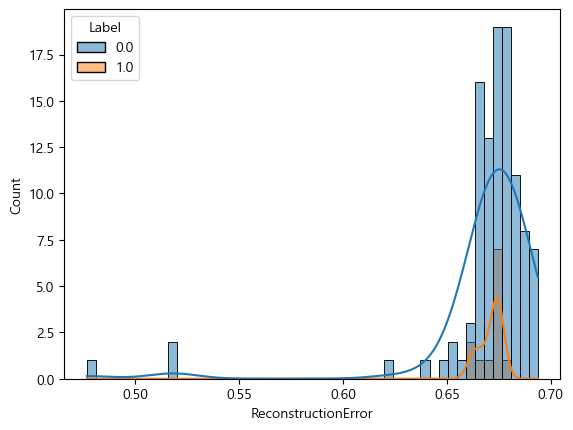

In [58]:
# 재건 에러 계산 함수
def reconstruction_error(x, p):
    return np.mean(np.abs(x - p), axis=(1, -1))

rce = reconstruction_error(X_test_sc, X_test_pred)
print(f"Modified rce shape: {rce.shape}")

# rce와 y_val을 하나의 DataFrame으로 만듭니다.
df = pd.DataFrame({'ReconstructionError': rce, 'Label': y_test})

# 히스토그램을 그립니다.
plt.figure()
sns.histplot(data=df, x='ReconstructionError', hue='Label', bins=50, kde=True)
plt.show()

Train Accuracy  :  0.19658119658119658
f1 score        :  0.2033898305084746
Recall Score    :  1.0
precision score :  0.11320754716981132
confusion matrix : ------------------
 [[11 94]
 [ 0 12]]

         --------- Test Classification Report --------
              precision    recall  f1-score   support

         0.0       1.00      0.10      0.19       105
         1.0       0.11      1.00      0.20        12

    accuracy                           0.20       117
   macro avg       0.56      0.55      0.20       117
weighted avg       0.91      0.20      0.19       117



<Figure size 640x480 with 0 Axes>

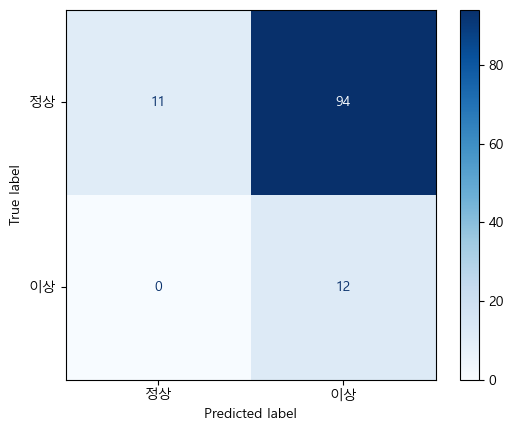

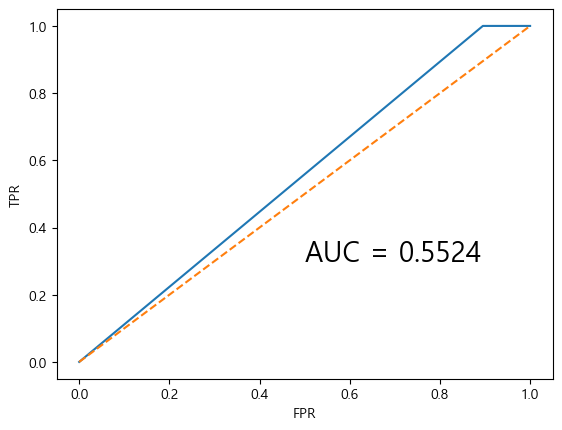

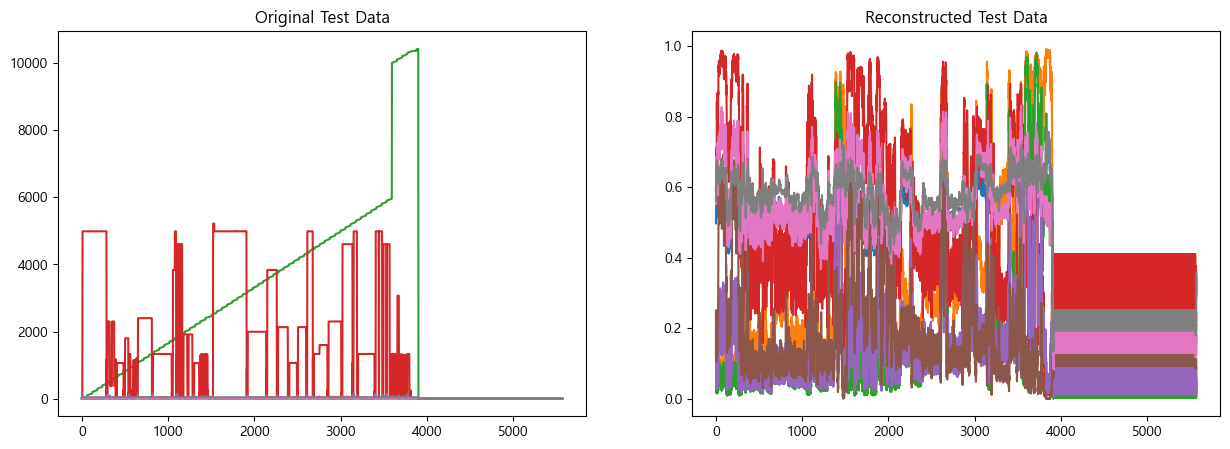

In [59]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, confusion_matrix, recall_score, precision_score

# 임계값 설정, 이 값은 문제에 따라 다르게 설정해야 할 수 있습니다.
threshold = 0.66

# 재구성 에러 계산
rce = reconstruction_error(X_test_sc, X_test_pred)

# 재구성 에러가 임계값보다 큰 경우를 'Bad'(1)로, 그렇지 않은 경우를 'Good'(0)으로 분류
p_test_bin = (rce > threshold).astype(int)

verification_test(y_test, p_test_bin)

# 원본 데이터와 재구성된 데이터의 비교 시각화 (테스트 데이터의 첫 번째 샘플을 사용)
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Original Test Data')
plt.plot(X_test[0])

plt.subplot(1, 2, 2)
plt.title('Reconstructed Test Data')
plt.plot(X_test_pred[0])

plt.show()

In [130]:
from tensorflow.keras import layers, Model

# 입력 차원 설정
input_shape = (X_train_sc.shape[1], X_train_sc.shape[2])  # (시간 스텝, 특성 수)
latent_dim = 4  # 잠재 공간의 차원

# 인코더 구성
enc_inputs = layers.Input(shape=input_shape)
x = layers.Conv1D(32, 3, activation='relu', padding='same')(enc_inputs)
x = layers.MaxPooling1D(2, padding='same')(x)
x = layers.Conv1D(16, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling1D(2, padding='same')(x)
x = layers.Conv1D(8, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling1D(2, padding='same')(x)
x = layers.Flatten()(x)
enc_outputs = layers.Dense(latent_dim, activation='relu')(x)

encoder = Model(inputs=enc_inputs, outputs=enc_outputs)

# 디코더 구성
dec_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(834)(dec_inputs)  # 이 값은 인코더의 마지막 MaxPooling1D 이후의 차원과 일치해야 합니다.
x = layers.Reshape((834, 1))(x)
x = layers.Conv1DTranspose(8, 3, activation='relu', padding='same')(x)
x = layers.UpSampling1D(2)(x)
x = layers.Conv1DTranspose(16, 3, activation='relu', padding='same')(x)
x = layers.UpSampling1D(2)(x)
x = layers.Conv1DTranspose(32, 3, activation='relu', padding='same')(x)
x = layers.UpSampling1D(2)(x)
dec_outputs = layers.Conv1DTranspose(8, 3, activation='linear', padding='same')(x)  # 원본 데이터와 동일한 차원

# 오토인코더 구성
inputs = layers.Input(shape=input_shape)
latent = encoder(inputs)
outputs = decoder(latent)

AE = Model(inputs=inputs, outputs=outputs)
AE.compile(optimizer='adam', loss='mse', metrics='acc')  # 오차 구하는 것 중에 미분이 잘 되는 것 mse
AE.summary()


Model: "model_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_56 (InputLayer)       [(None, 6137, 8)]         0         
                                                                 
 model_45 (Functional)       (None, 4)                 27324     
                                                                 
 model_42 (Functional)       (None, 6137, 8)           142064    
                                                                 
Total params: 169,388
Trainable params: 168,892
Non-trainable params: 496
_________________________________________________________________


In [131]:
from tensorflow.keras.callbacks import EarlyStopping

es_callback = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
history = AE.fit(X_train_sc, X_train_sc, validation_split=0.2, batch_size=32, epochs=500, callbacks=[es_callback])

Epoch 1/500


ResourceExhaustedError: Graph execution error:

Detected at node 'model_46/model_42/activation_72/Gelu/truediv' defined at (most recent call last):
    File "C:\Python\Python38\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Python\Python38\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\ipykernel\kernelapp.py", line 728, in start
      self.io_loop.start()
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Python\Python38\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "C:\Python\Python38\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "C:\Python\Python38\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell
      await result
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\PC\AppData\Local\Temp\ipykernel_9260\725247245.py", line 4, in <module>
      history = AE.fit(X_train_sc, X_train_sc, validation_split=0.2, batch_size=32, epochs=500, callbacks=[es_callback])
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\keras\layers\core\activation.py", line 59, in call
      return self.activation(inputs)
    File "c:\Users\PC\Bcode\tensor\lib\site-packages\keras\activations.py", line 359, in gelu
      return tf.nn.gelu(x, approximate)
Node: 'model_46/model_42/activation_72/Gelu/truediv'
failed to allocate memory
	 [[{{node model_46/model_42/activation_72/Gelu/truediv}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_907880]

In [24]:
# 모델을 통해 데이터를 재구성
X_train_pred = autoencoder.predict(X_train_sc)
X_test_pred = autoencoder.predict(X_test_sc)

4/4 [==============================] - 0s 32ms/step


Modified rce shape: (117,)


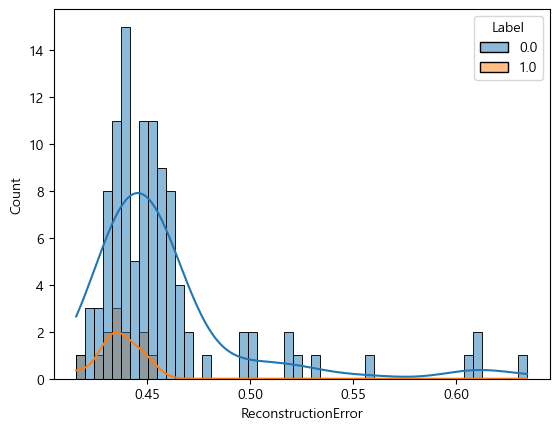

In [25]:
# 재건 에러 계산 함수
def reconstruction_error(x, p):
    return np.mean(np.abs(x - p), axis=(1, -1))

rce = reconstruction_error(X_test_sc, X_test_pred)
print(f"Modified rce shape: {rce.shape}")

# rce와 y_val을 하나의 DataFrame으로 만듭니다.
df = pd.DataFrame({'ReconstructionError': rce, 'Label': y_test})

# 히스토그램을 그립니다.
plt.figure()
sns.histplot(data=df, x='ReconstructionError', hue='Label', bins=50, kde=True)
plt.show()


Train Accuracy  :  0.811965811965812
f1 score        :  0.0
Recall Score    :  0.0
precision score :  0.0
confusion matrix : ------------------
 [[95 10]
 [12  0]]

         --------- Test Classification Report --------
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90       105
         1.0       0.00      0.00      0.00        12

    accuracy                           0.81       117
   macro avg       0.44      0.45      0.45       117
weighted avg       0.80      0.81      0.80       117



<Figure size 640x480 with 0 Axes>

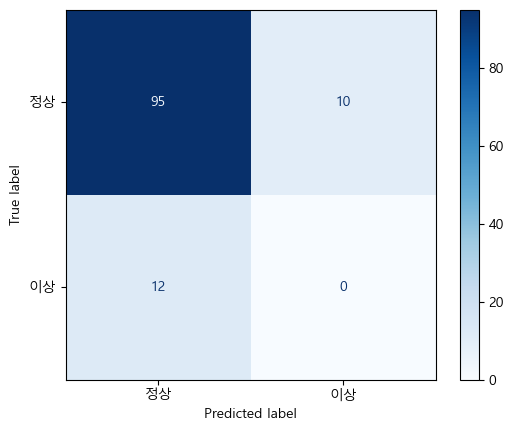

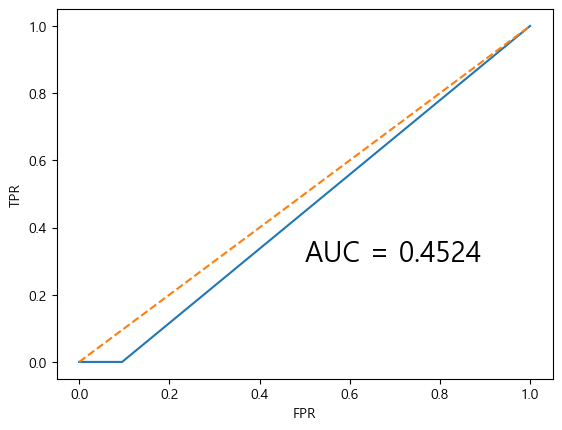

In [26]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, confusion_matrix, recall_score, precision_score

# 임계값 설정, 이 값은 문제에 따라 다르게 설정해야 할 수 있습니다.
threshold = 0.5

# 재구성 에러 계산
rce = reconstruction_error(X_test_sc, X_test_pred)

# 재구성 에러가 임계값보다 큰 경우를 'Bad'(1)로, 그렇지 않은 경우를 'Good'(0)으로 분류
p_test_bin = (rce > threshold).astype(int)

verification_test(y_test, p_test_bin)